# ESTADÍSTICA DESCRIPTIVA

In [1]:
%matplotlib inline
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Manejo de datos.
sismos = pd.read_html('sismos.xls', header=9)
sismos = sismos[0]
sismos = sismos.rename(columns={'Fecha aaaa/mm/dd':'Fecha', 
                                'Hora UTChh:mm:ss':'Hora',                      
                                'LatitudGrados':'qlat',
                                'LongitudGrados':'qlon',
                                'ProfundidadKm':'qdepth',
                                'MagnitudMl':'Ml',
                                'MagnitudMw':'Mw'})
fechas=[]
years=[]
meses=[]
for i in range(len(sismos)):
    fecha = sismos['Fecha'][i]+' '+sismos['Hora'][i]
    fechas.append(datetime.strptime(fecha,"%Y-%m-%d %H:%M:%S"))
    years.append(fechas[-1].year)
    meses.append(fechas[-1].month)
sismos['fechas']=fechas
sismos['years']=years
sismos['mes']=meses

In [2]:
print ("El numero de sismos con magnitud mayor a 4.0 registrados es:", len(sismos))

El numero de sismos con magnitud mayor a 4.0 registrados es: 2773


### En la siguiente tabla, se observa un análisis amplio, especialmente sobre la latitud, longitud, profundidad y magnitud de los sismos en Colombia desde 1993.

In [3]:
sismos.describe()

,qlat,qlon,qdepth,Ml,Mw,# Estaciones,RmsSeg,GapGrados,Error Latitud (Km),Error Longitud (Km),Error Profundidad (Km),years,mes
count,2773.000000,2773.000000,2773.000000,2773.000000,351.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000
mean,6.483482,-74.261139,105.933429,4.397512,4.506838,14.000000,0.779149,199.188604,12.802200,15.744140,21.314172,2002.423008,6.415435
std,1.889685,2.209637,75.565637,0.433655,0.486925,10.654654,0.471351,78.169203,16.313814,16.058257,23.337344,6.670584,3.405253
min,-3.483000,-89.024000,0.000000,4.000000,3.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1993.000000,1.000000
25%,6.645000,-75.262000,26.000000,4.100000,4.200000,9.000000,0.500000,150.000000,4.700000,6.700000,8.200000,1997.000000,3.000000
50%,6.812000,-73.132000,149.200000,4.300000,4.400000,11.000000,0.700000,189.000000,7.300000,11.600000,12.600000,2001.000000,6.000000
75%,6.866000,-73.053000,155.000000,4.600000,4.700000,14.000000,0.900000,272.000000,13.500000,17.400000,23.000000,2007.000000,9.000000
max,14.907000,-67.168000,700.000000,6.800000,7.100000,96.000000,8.200000,360.000000,99.900000,99.900000,99.900000,2017.000000,12.000000


### Por ejemplo basándonos solo en la profundidad de los sismos, observamos en la tabla que:

In [4]:
print("El promedio de profundidades de los sismos es:", sismos.qdepth.mean(), '\n')

print("La minima profundidad fue de", sismos.qdepth.min(), 'km')
print("La maxima profundidad fue de", sismos.qdepth.max(), 'km\n')

print("La variabilidad de las profundidades con respecto al promedio es de", sismos.qdepth.std(), 'km\n')

print("El 25% de las profundidades se encuentra entre", sismos.qdepth.quantile(0.25), 'km')
print("El 50% de las profundidades se encuentra entre", sismos.qdepth.quantile(0.5), 'km')
print("El 75% de las profundidades se encuentra entre", sismos.qdepth.quantile(0.75), 'km\n')

print("Estos fueron los sismos con mayor profundidad;")
sismos[sismos.qdepth==700]

El promedio de profundidades de los sismos es: 105.933429499 

La minima profundidad fue de 0.0 km
La maxima profundidad fue de 700.0 km

La variabilidad de las profundidades con respecto al promedio es de 75.565637187 km

El 25% de las profundidades se encuentra entre 26.0 km
El 50% de las profundidades se encuentra entre 149.2 km
El 75% de las profundidades se encuentra entre 155.0 km

Estos fueron los sismos con mayor profundidad;


,Fecha,Hora,qlat,qlon,qdepth,Ml,Mw,Departamento,Municipio,# Estaciones,RmsSeg,GapGrados,Error Latitud (Km),Error Longitud (Km),Error Profundidad (Km),Estado,fechas,years,mes
576,1996-07-08,11:58:47,5.678,-75.086,700.0,4.4,NaN,ANTIOQUIA,ARGELIA,7,4.3,137,11.1,23.8,99.9,Revisado,1996-07-08 11:58:47,1996,7
826,1998-05-13,23:19:36,3.839,-75.915,700.0,4.3,NaN,TOLIMA,RONCESVALLES,6,4.4,134,46.8,41.9,99.9,Revisado,1998-05-13 23:19:36,1998,5
835,1998-05-22,04:38:55,1.598,-72.293,700.0,4.8,NaN,GUAVIARE,MIRAFLORES,11,3.4,308,27.0,92.4,99.9,Revisado,1998-05-22 04:38:55,1998,5
836,1998-05-22,04:51:52,2.375,-72.452,700.0,6.5,NaN,GUAVIARE,SAN_JOSE_DEL_GUAVIARE,11,4.5,313,25.9,23.0,12.5,Revisado,1998-05-22 04:51:52,1998,5
837,1998-05-22,06:20:06,-2.234,-71.957,700.0,5.1,NaN,AMAZONAS,LA_CHORRERA,9,1.9,314,0.1,37.4,68.0,Revisado,1998-05-22 06:20:06,1998,5
838,1998-05-22,07:21:15,-1.886,-71.964,700.0,4.5,NaN,AMAZONAS,LA_CHORRERA,10,2.6,312,94.1,26.9,31.2,Revisado,1998-05-22 07:21:15,1998,5
839,1998-05-23,12:56:07,-1.671,-72.789,700.0,4.6,NaN,AMAZONAS,LA_CHORRERA,8,1.9,309,92.0,22.4,99.9,Revisado,1998-05-23 12:56:07,1998,5
840,1998-05-23,18:01:58,5.117,-75.879,700.0,4.4,NaN,RISARALDA,APIA,10,4.7,106,73.2,48.5,64.1,Revisado,1998-05-23 18:01:58,1998,5
860,1998-06-23,11:03:37,7.814,-70.686,700.0,4.1,NaN,ARAUCA,ARAUCA,10,2.4,299,11.6,66.1,42.3,Revisado,1998-06-23 11:03:37,1998,6


Text(0.5,1,'Analisis de la profundidad de los sismos')

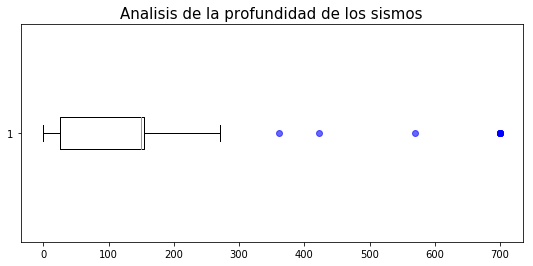

In [5]:
fig = plt.figure(figsize=(9, 4))
ax = fig.gca()
bp = ax.boxplot(sismos.qdepth, sym='bo', whis=1.50, vert=False)
for flier in bp['fliers']:
    flier.set(alpha=0.6)
ax.set_title("Analisis de la profundidad de los sismos", fontsize=15)

### Ahora observamos un análisis estadístico del número de sismos por departamentos.

In [6]:
Departamentos = pd.Series([sismos["Departamento"]])

Fi = Departamentos[0].value_counts() # Frecuencia absoluta de los departamentos.
Di = Fi.index # Nombre de los departamentos.

Departamentos = pd.DataFrame(dict(departamentos=Di,numeros_sismos=Fi.values),
                        columns=["departamentos","numeros_sismos"])

print(Departamentos.numeros_sismos.describe(), '\n')

print("El departamento con más sismos registrados es:")
Departamentos[Departamentos.numeros_sismos==Departamentos.numeros_sismos.max()]

count      31.000000
mean       89.451613
std       289.303282
min         1.000000
25%         6.500000
50%        26.000000
75%        48.000000
max      1625.000000
Name: numeros_sismos, dtype: float64 

El departamento con más sismos registrados es:


,departamentos,numeros_sismos
0,SANTANDER,1625


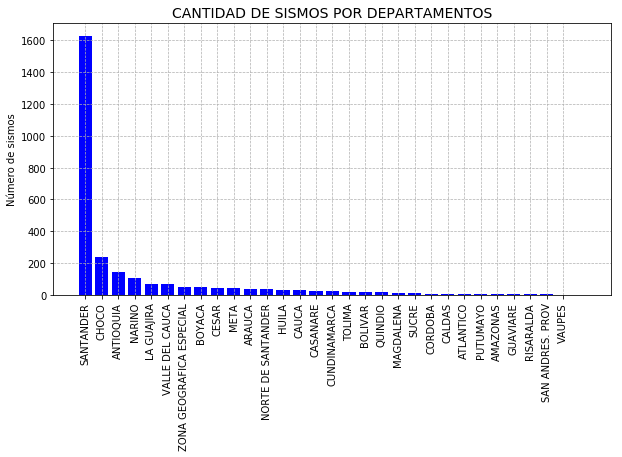

In [7]:
fig=plt.figure(figsize=(10,5))
ax=fig.gca()
ax.bar(Departamentos.index, Departamentos.numeros_sismos, color='b')
ax.set_xticks(np.arange(30))
Dep = Departamentos.departamentos.values
Dep[28] = 'SAN ANDRES. PROV'
ax.set_xticklabels(Dep,rotation=90)
ax.set_title("CANTIDAD DE SISMOS POR DEPARTAMENTOS", fontsize=14)
ax.set_ylabel("Número de sismos")
ax.grid(linestyle='--', linewidth=0.7)

### Ahora observamos un análisis estadístico del número de sismos por año

In [8]:
Anios = pd.Series([sismos["years"]])

Fi = Anios[0].value_counts() # Frecuencia absoluta de los anios.
Di = Fi.index # Nombre de los anios.

Anios = pd.DataFrame(dict(years=Di,numeros_sismos=Fi.values),
                        columns=["years","numeros_sismos"])

print(Anios.numeros_sismos.describe(), '\n')

print("El anio con más sismos registrados es:")
Anios[Anios.numeros_sismos==Anios.numeros_sismos.max()]

count     25.000000
mean     110.920000
std       55.409777
min       52.000000
25%       66.000000
50%      104.000000
75%      121.000000
max      269.000000
Name: numeros_sismos, dtype: float64 

El anio con más sismos registrados es:


,years,numeros_sismos
0,2000,269


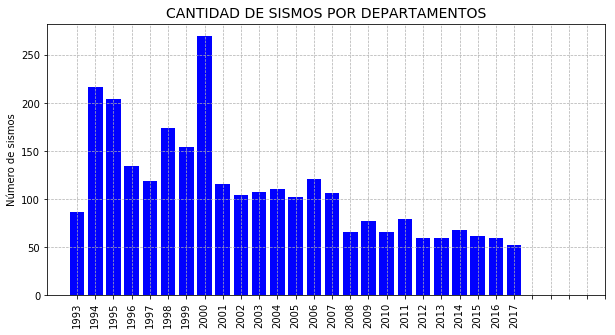

In [9]:
fig=plt.figure(figsize=(10,5))
ax=fig.gca()
Anios=Anios.sort_values(['years'])
Anios=Anios.reset_index()
ax.bar(Anios.index, Anios.numeros_sismos, color='b')
ax.set_xticks(np.arange(30))
Anio = Anios.years.values
ax.set_xticklabels(Anio,rotation=90)
ax.set_title("CANTIDAD DE SISMOS POR DEPARTAMENTOS", fontsize=14)
ax.set_ylabel("Número de sismos")
ax.grid(linestyle='--', linewidth=0.7)

# PROBABILIDADES

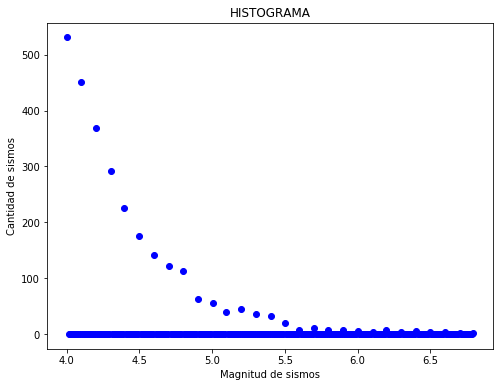

In [10]:
# Histograma
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
Ml = sismos.Ml
f,Mi=np.histogram(Ml,300)
Mm=(Mi[:-1]+Mi[1:])/2
ax.set_title("HISTOGRAMA")
ax.set_xlabel("Magnitud de sismos")
ax.set_ylabel("Cantidad de sismos")

plt.plot(Mm,f,'bo')

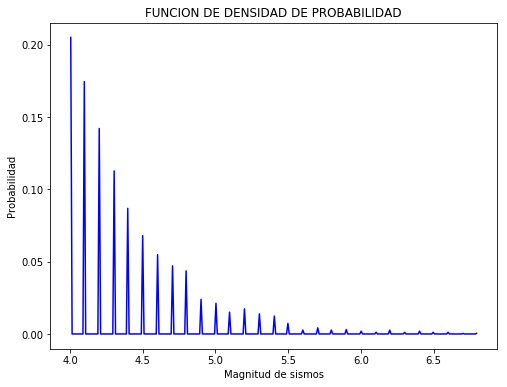

In [11]:
# Funcion de densidad de probabilidad.
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
ax.set_title("FUNCION DE DENSIDAD DE PROBABILIDAD")
ax.set_xlabel("Magnitud de sismos")
ax.set_ylabel("Probabilidad")
N = len(Ml)
dM=Mi[1]-Mi[0]
p=f/(N*dM)
ax.plot(Mm,p/100, 'b')


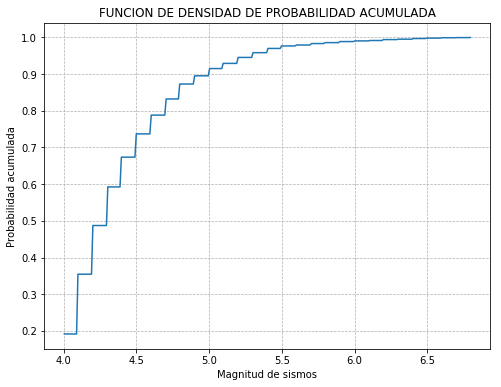

In [12]:
#Estimar la funcion cumulativa de probabilidad
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
ax.set_title("FUNCION DE DENSIDAD DE PROBABILIDAD ACUMULADA")
ax.set_xlabel("Magnitud de sismos")
ax.set_ylabel("Probabilidad acumulada")
P=np.cumsum(p)*dM
ax.plot(Mm,P)
ax.grid(linestyle='--', linewidth=0.7)

# DESCRIPCIÓN GRÁFICAS

A continuación por medio de gráficas se demuestran los resultados de los análisis estadísticos anteriores.

En el caso de no reproducirse las figuras, se encuentran en youtube y los links se verán después de cada título.

In [5]:
# Esta es una funcion que permite visualizar los gifs en Jupyter Notebook.
def display_gif(fn):
    from IPython import display
    return display.HTML('<img src="{}">'.format(fn))

## Gráfica 1
https://youtu.be/PWLX1q-8HEU

+ ### Gráfica 1.1: Sismos en coordenadas polares.
https://youtu.be/a3qMOhNWet8

Esta gráfica en coordenadas polares verifica que el año con mayor números de sismos con magnitud superior a 4.0 es el 2000.

In [9]:
display_gif("Figura1.gif")

+ ### Gráfica 1.2: Mapa de sismos.
https://youtu.be/6RAFnf55Ab8

Este mapa permite verificar quela mayoría de los sismos se presentan en Santander.

+ ### Gráfica 1.3: Mapa de sismos.
https://youtu.be/6MEuY4HiAoc

Esta gráfica permite establecer una relación entre la magnitud y la profundidad de los sismos, además es posible comprender mejor el análisis descriptivo de dichas magnitudes.

Text(0,0.5,'Profundidad')

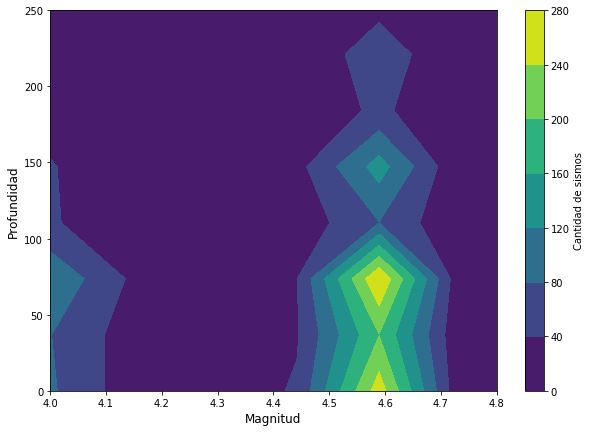

In [29]:
nmin, nmax = sismos.Ml.min(), sismos.Ml.max()
pmin, pmax = sismos.qdepth.min(), sismos.qdepth.max()

Magn = np.linspace(nmin, nmax, 20)
Prof = np.linspace(pmin, pmax, 20)

M, P =np.meshgrid(Magn,Prof)

histogram2d=np.zeros_like(P)

for i in range(len(Magn)-1):
    for j in range(len(Prof)-1):
        cond1 = (sismos['Ml']>Magn[i])
        cond2 = (sismos['Ml']<Magn[i+1])
        cond3 = (sismos['qdepth']>Prof[j])
        cond4 = (sismos['qdepth']<Prof[j+1])
        S = sismos[cond1 & cond2 & cond3 & cond4]
        histogram2d[i,j]=len(S)
        
fig = plt.figure(figsize=(10,7))
ax=fig.gca()
c = ax.contourf(M, P, histogram2d)
fig.colorbar(c, label='Cantidad de sismos')
ax.set_xlim(4,4.8)
ax.set_ylim(0, 250)
ax.set_xlabel("Magnitud", fontsize=12)
ax.set_ylabel("Profundidad", fontsize=12)